### Scikit-learn Decision Tree Classifier Implementation for Large DataSet (2010, 2014, 2018)

In [14]:
# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image, display
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as pltimg
from dtreeviz.trees import dtreeviz 


In [15]:
#Reading and spliting our dataset to training and testing data
trainingData = pd.read_csv("../Data/LargeTrainingData.csv")
testingData = pd.read_csv("../Data/LargeTestingData.csv")

# Training Data 
targets = trainingData["home_team_result"]
targets = targets.values.reshape(-1,1)
features = trainingData.drop(["home_team_name", "away_team_name", "home_team_goal_count", "away_team_goal_count", "home_team_result","winner_encoded"],axis=1).values
featuresTrain = features
targetsTrain = targets

# Testing Data
targets = testingData["home_team_result"]
targets = targets.values.reshape(-1,1)
features = testingData.drop(["home_team_name", "away_team_name", "home_team_goal_count", "away_team_goal_count", "home_team_result"],axis=1).values
featuresTest = features
targetsTest = targets

In [16]:
#Average of 1000 runs since each run gives different result
#Small dataset doesn't give variation results while large dataset give variation results
dtree = DecisionTreeClassifier()

total = 0
for i in range(1000):
    #Training
    dtree = dtree.fit(featuresTrain, targetsTrain)
    #Testing
    dtree.predict(featuresTest)
    total += dtree.score(featuresTest,targetsTest)

print(total/1000)


0.5080625


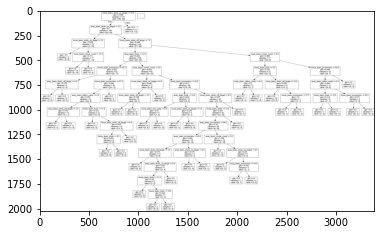

<Figure size 1080x1080 with 0 Axes>

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [17]:
#Generate graphs
df = pd.read_csv("../Data/LargeTestingData.csv")
featuresName = df.drop(["home_team_name", "away_team_name", "home_team_goal_count", "away_team_goal_count", "home_team_result"],axis=1)

df = tree.export_graphviz(dtree, out_file=None, feature_names=featuresName.columns.values.tolist())
graph = pydotplus.graph_from_dot_data(df)
graph.write_png('mydecisiontreeLarge.png')
img=pltimg.imread('mydecisiontreeLarge.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(15,15))
plt.show()
plt.savefig

In [18]:
#dtreeviz graph
targetsTrain = targetsTrain.reshape(-1)
viz = dtreeviz(dtree, featuresTrain, targetsTrain,
                target_name="target",
                feature_names=featuresName.columns.values.tolist(),
                class_names=[0.,1.])
viz
viz.save("dtreevizLarge.svg")

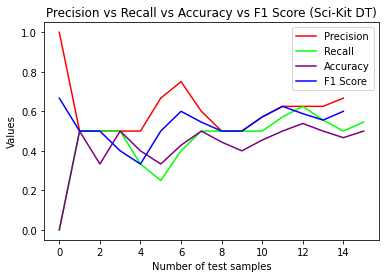

Evaulation Metrics
Accuracy: 50.00%
Precision: 0.67
Recall: 0.55
F1 Score: 0.60


In [19]:
# Precision and Recall
def precisionAndRecall(predictedValues):
    actualValues = [1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1]
    truePositives = 0
    trueNegatives = 0
    falsePositives = 0
    falseNegatives = 0
    precision = []
    recall = []
    accuracy = []
    f1 = []

    for index in range(len(predictedValues)):
        if(predictedValues[index]==1 and actualValues[index]==1):
            truePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
            
        
        if(predictedValues[index]==1 and actualValues[index]==0):
            falsePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
        
        if(predictedValues[index]==0 and actualValues[index]==0):
            trueNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

        if(predictedValues[index]==0 and actualValues[index]==1):
            falseNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

    return precision,recall,accuracy,f1

precision, recall, accuracy, f1 = precisionAndRecall(dtree.predict(featuresTest))

plt.title("Precision vs Recall vs Accuracy vs F1 Score (Sci-Kit DT)")
plt.xlabel("Number of test samples")
plt.ylabel("Values")
plt.plot(precision,color = "red", label = "Precision")
plt.plot(recall,color = "lime", label = "Recall")
plt.plot(accuracy,color = "purple", label = "Accuracy")
plt.plot(f1,color = "blue", label = "F1 Score")

plt.legend()
plt.show()

print("Evaulation Metrics")
print("Accuracy: {:.2f}%".format(accuracy[-1]*100))
print("Precision: {:.2f}".format(precision[-1]))
print("Recall: {:.2f}".format(recall[-1]))
print("F1 Score: {:.2f}".format(f1[-1]))